In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [133]:
os.chdir(r'C:\Users\admin\Desktop\Kaggle_competition\Project_1')
os.listdir()

['11111-checkpoint.ipynb', '11111.ipynb', 'adidas.csv', 'players_20.csv']

### First we are going to read our data

In [134]:
df=pd.read_csv('adidas.csv')

In [135]:
df.head()

,url,name,sku,selling_price,original_price,currency,availability,color,category,source,source_website,breadcrumbs,description,brand,images,country,language,average_rating,reviews_count,crawled_at
0,https://www.adidas.com/us/beach-shorts/FJ5089....,Beach Shorts,FJ5089,40,NaN,USD,InStock,Black,Clothing,adidas United States,https://www.adidas.com,Women/Clothing,Splashing in the surf. Making memories with yo...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.5,35,2021-10-23 17:50:17.331255
1,https://www.adidas.com/us/five-ten-kestrel-lac...,Five Ten Kestrel Lace Mountain Bike Shoes,BC0770,150,NaN,USD,InStock,Grey,Shoes,adidas United States,https://www.adidas.com,Women/Shoes,Lace up and get after it. The Five Ten Kestrel...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.8,4,2021-10-23 17:50:17.423830
2,https://www.adidas.com/us/mexico-away-jersey/G...,Mexico Away Jersey,GC7946,70,NaN,USD,InStock,White,Clothing,adidas United States,https://www.adidas.com,Kids/Clothing,"Clean and crisp, this adidas Mexico Away Jerse...",adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.9,42,2021-10-23 17:50:17.530834
3,https://www.adidas.com/us/five-ten-hiangle-pro...,Five Ten Hiangle Pro Competition Climbing Shoes,FV4744,160,NaN,USD,InStock,Black,Shoes,adidas United States,https://www.adidas.com,Five Ten/Shoes,The Hiangle Pro takes on the classic shape of ...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,3.7,7,2021-10-23 17:50:17.615054
4,https://www.adidas.com/us/mesh-broken-stripe-p...,Mesh Broken-Stripe Polo Shirt,GM0239,65,NaN,USD,InStock,Blue,Clothing,adidas United States,https://www.adidas.com,Men/Clothing,Step up to the tee relaxed. This adidas golf p...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.7,11,2021-10-23 17:50:17.702680


In [136]:
df.dtypes

url                object
name               object
sku                object
selling_price       int64
original_price     object
currency           object
availability       object
color              object
category           object
source             object
source_website     object
breadcrumbs        object
description        object
brand              object
images             object
country            object
language           object
average_rating    float64
reviews_count       int64
crawled_at         object
dtype: object

In [137]:
df.isna().sum()

url                0
name               0
sku                0
selling_price      0
original_price    16
currency           0
availability       0
color              0
category           0
source             0
source_website     0
breadcrumbs        0
description        0
brand              0
images             0
country            0
language           0
average_rating     0
reviews_count      0
crawled_at         0
dtype: int64

In [138]:
df.shape

(845, 20)

In [139]:
df.corr()

,selling_price,average_rating,reviews_count
selling_price,1.000000,-0.213004,0.102654
average_rating,-0.213004,1.000000,0.023585
reviews_count,0.102654,0.023585,1.000000


In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
selling_price,845.0,53.192899,31.411645,9.0,28.0,48.0,70.0,240.0
average_rating,845.0,4.608402,0.293795,1.0,4.5,4.7,4.8,5.0
reviews_count,845.0,426.178698,1229.158277,1.0,19.0,68.0,314.0,11750.0


In [141]:
aa=df.isna().sum()
perc_missing=(np.sum(aa.values)/df.shape[0])*100
perc_missing

1.8934911242603552

In [142]:
# Since the percentage is less than 2 percent so we can drop the null values 

In [143]:
df.dropna(how='any',inplace=True)

In [144]:
df.isna().sum()

url               0
name              0
sku               0
selling_price     0
original_price    0
currency          0
availability      0
color             0
category          0
source            0
source_website    0
breadcrumbs       0
description       0
brand             0
images            0
country           0
language          0
average_rating    0
reviews_count     0
crawled_at        0
dtype: int64

## Univariate Analysis

In [145]:
obj=df.select_dtypes(include='object').columns

In [146]:
def obj_analysis(i):
    aa1=df[i].value_counts()
    aa2=df[i].value_counts(normalize=True)
    aa3=pd.concat([aa1,aa2],axis=1)
    return aa3

In [147]:
print(obj_analysis('crawled_at').shape)
obj_analysis('crawled_at')

(829, 2)


,crawled_at,crawled_at
2021-10-23 17:50:19.626607,1,0.001206
2021-10-23 17:51:42.903960,1,0.001206
2021-10-23 17:51:40.882211,1,0.001206
2021-10-23 17:51:40.960433,1,0.001206
2021-10-23 17:51:41.036267,1,0.001206
...,...,...
2021-10-23 17:51:01.626993,1,0.001206
2021-10-23 17:51:01.727629,1,0.001206
2021-10-23 17:51:01.808880,1,0.001206
2021-10-23 17:51:01.890309,1,0.001206


In [149]:
dropp=['url','sku','currency','source','source_website','description','brand','images','country','language','crawled_at']
# dropping currency,source,'source_website','brand','country','language' because there is ony one type of category
# dropping 'name','url','sku','description','images',crawled_at because there are too many categories to consider.

In [150]:
df.drop(dropp,axis=1,inplace=True)
df.columns

Index(['name', 'selling_price', 'original_price', 'availability', 'color',
       'category', 'breadcrumbs', 'average_rating', 'reviews_count'],
      dtype='object')

In [151]:
df.head()

,name,selling_price,original_price,availability,color,category,breadcrumbs,average_rating,reviews_count
15,Essentials Loose Logo Tank Top,20,$25,InStock,Purple,Clothing,Women/Clothing,4.8,116
16,Essentials Loose Logo Tank Top,20,$25,InStock,Pink,Clothing,Women/Clothing,4.8,116
18,Essentials Loose Logo Tank Top,20,$25,InStock,Green,Clothing,Women/Clothing,4.8,116
19,Formotion Sculpt Tights,48,$80,InStock,Blue,Clothing,Women/Clothing,4.2,144
20,Marvel X Ghosted.3 Firm Ground Cleats,64,$80,InStock,Blue,Shoes,Soccer/Shoes,4.4,160


In [152]:
df.dtypes

name               object
selling_price       int64
original_price     object
availability       object
color              object
category           object
breadcrumbs        object
average_rating    float64
reviews_count       int64
dtype: object

In [153]:
# Since original price should be in integer so it has to be converted into integer and we can do it by eliminating &

In [154]:
df['original_price']=df['original_price'].apply(lambda x:int(x[1:]))

In [155]:
df.dtypes

name               object
selling_price       int64
original_price      int64
availability       object
color              object
category           object
breadcrumbs        object
average_rating    float64
reviews_count       int64
dtype: object

In [156]:
df['breadcrumbs'].value_counts()

Women/Clothing           173
Women/Shoes              153
Men/Shoes                142
Men/Clothing             125
Kids/Shoes                69
Originals/Shoes           35
Kids/Clothing             27
Training/Accessories      25
Originals/Accessories     22
Women/Accessories         16
Men/Accessories           12
Soccer/Shoes              10
Swim/Shoes                 7
Running/Shoes              5
Soccer/Accessories         2
Essentials/Shoes           1
Originals/Clothing         1
Essentials/Clothing        1
Sportswear/Clothing        1
Running/Accessories        1
Kids/Accessories           1
Name: breadcrumbs, dtype: int64

In [157]:
df['category']=df['breadcrumbs'].apply(lambda x:x.split('/')[0])
df['product_type']=df['breadcrumbs'].apply(lambda x:x.split('/')[1])

In [158]:
df.head()

,name,selling_price,original_price,availability,color,category,breadcrumbs,average_rating,reviews_count,product_type
15,Essentials Loose Logo Tank Top,20,25,InStock,Purple,Women,Women/Clothing,4.8,116,Clothing
16,Essentials Loose Logo Tank Top,20,25,InStock,Pink,Women,Women/Clothing,4.8,116,Clothing
18,Essentials Loose Logo Tank Top,20,25,InStock,Green,Women,Women/Clothing,4.8,116,Clothing
19,Formotion Sculpt Tights,48,80,InStock,Blue,Women,Women/Clothing,4.2,144,Clothing
20,Marvel X Ghosted.3 Firm Ground Cleats,64,80,InStock,Blue,Soccer,Soccer/Shoes,4.4,160,Shoes


In [159]:
df.drop('breadcrumbs',axis=1,inplace=True)

In [160]:
df.head()

,name,selling_price,original_price,availability,color,category,average_rating,reviews_count,product_type
15,Essentials Loose Logo Tank Top,20,25,InStock,Purple,Women,4.8,116,Clothing
16,Essentials Loose Logo Tank Top,20,25,InStock,Pink,Women,4.8,116,Clothing
18,Essentials Loose Logo Tank Top,20,25,InStock,Green,Women,4.8,116,Clothing
19,Formotion Sculpt Tights,48,80,InStock,Blue,Women,4.2,144,Clothing
20,Marvel X Ghosted.3 Firm Ground Cleats,64,80,InStock,Blue,Soccer,4.4,160,Shoes


In [161]:
# Lets do some EDA

## lets lookout for outliers

In [162]:
df.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99])

,selling_price,original_price,average_rating,reviews_count
count,829.000000,829.000000,829.000000,829.000000
mean,52.911942,69.008444,4.608323,433.943305
std,31.151542,40.490127,0.292690,1239.690004
min,9.000000,14.000000,1.000000,1.000000
1%,12.000000,15.000000,3.900000,1.000000
2%,13.000000,18.000000,3.900000,1.000000
3%,16.000000,20.000000,4.000000,2.000000
4%,16.120000,22.000000,4.100000,2.000000
5%,18.000000,25.000000,4.100000,2.000000
10%,20.000000,25.000000,4.200000,5.000000


## Boxplot

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\si

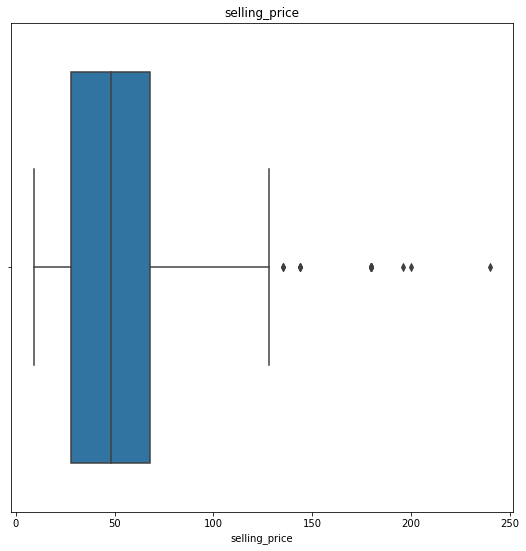

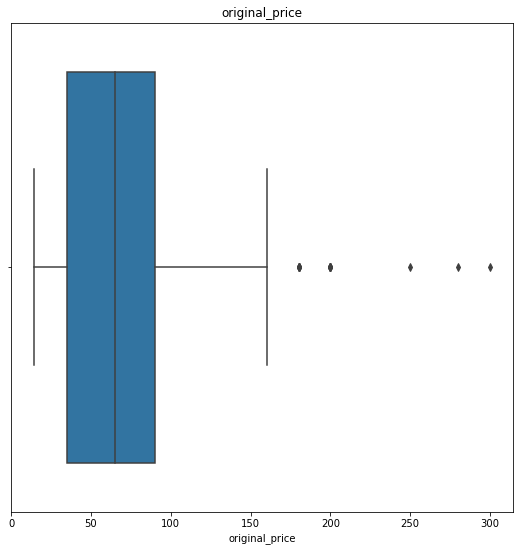

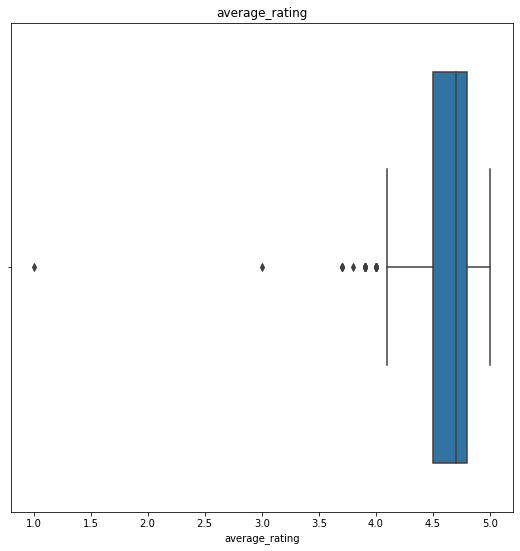

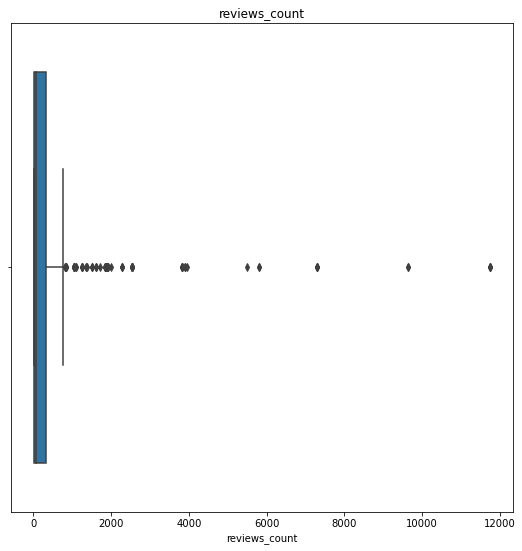

In [163]:
num=df.select_dtypes(exclude='object').columns
for i in num:
    plt.figure(figsize=(9,9))
    sns.boxplot(df[i])
    plt.title(i)
plt.show()
    

In [164]:
# as we can see selling_price,original_price,reviews_count has some upper outliers
# as we can see averaging_rating has some lower outliers

## We can lookout for duplicate values

In [165]:
df.duplicated().sum()

65

## Bi-variate analysis`

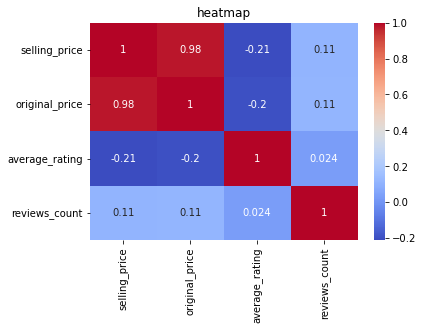

In [169]:
## for continuous-continuous variable
aa=df.corr()
bb=aa[abs(aa)>0.5]
sns.heatmap(aa,annot=True,cmap='coolwarm')
plt.title('heatmap')
plt.show()

In [171]:
# so we can see that selling price and original pice has very strong coorelation

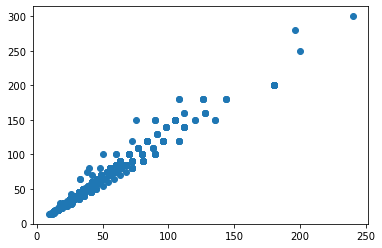

In [173]:
plt.scatter(df['selling_price'],df['original_price'])
plt.show() # these two feayure has a linear relationship between them

### Distributions plot

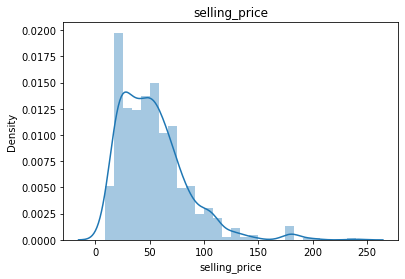

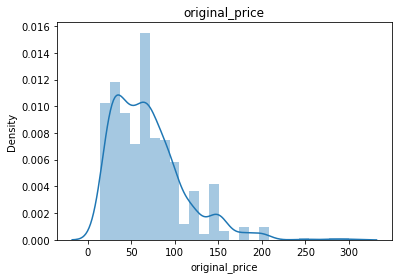

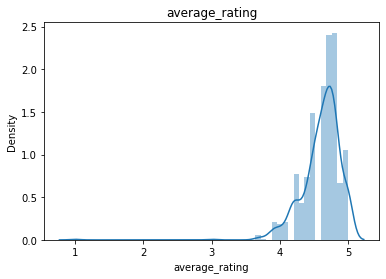

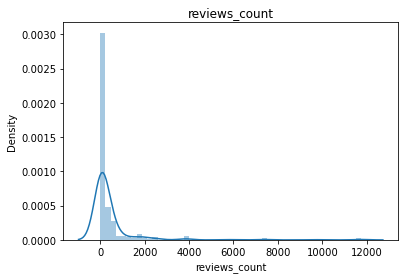

In [184]:
for i in num:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

In [182]:
for i in num:
    print(f'skewness {i}',df[i].skew())
    print(f'kurtosis {i}',df[i].kurtosis())

skewness selling_price 1.6035632413907996
kurtosis selling_price 4.397460131677713
skewness original_price 1.3586501438421288
kurtosis original_price 2.874257454362692
skewness average_rating -3.018597900323552
kurtosis average_rating 28.39170077703864
skewness reviews_count 6.12345950201822
kurtosis reviews_count 44.79207748305819


In [186]:
## Conclusion from this distribution plot graph
# for selling_price it is right skewed and majority of the data lies 10-70
# for original_price it is right skewed and majority of the data lies 10-90
# for average_rating it is left skewed and majority of the data lies 4-5
# for reviews_rating it is right skewed and majority of the data lies below 6

In [224]:
def obj_analysis_graph(i):
    aa1=df[i].value_counts()
    aa2=df[i].value_counts(normalize=True)
    aa3=pd.concat([aa1,aa2],axis=1)
    aa3.columns=['counts','perc']
    plt.figure(figsize=(10,6))
    plt.barh(aa3.index[:5],aa3['counts'][:5],color=['green','red','blue','pink','grey'])
    plt.ylabel(i)
    plt.xlabel("No.of Products")
    plt.title("Product Selling Price ($USD) Vs. No.of Products")
    plt.show()

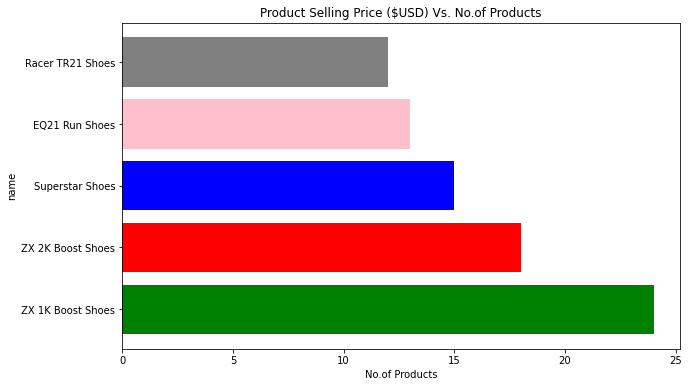

In [225]:
obj_analysis_graph('name')

In [227]:
# Maximum Selling Price

print("The Maximun Selling Price is:",df['selling_price'].max(),"USD")

The Maximun Selling Price is: 240 USD


In [229]:
# Minimum Selling Price

print("The Maximun Selling Price is:",df['selling_price'].min(),"USD")

The Maximun Selling Price is: 9 USD


In [232]:
# Averae Selling Price

print("The Maximun Selling Price is:",round(df['selling_price'].mean(),2),"USD")

The Maximun Selling Price is: 52.91 USD


In [233]:
df.columns

Index(['name', 'selling_price', 'original_price', 'availability', 'color',
       'category', 'average_rating', 'reviews_count', 'product_type'],
      dtype='object')

In [234]:
df.dtypes

name               object
selling_price       int64
original_price      int64
availability       object
color              object
category           object
average_rating    float64
reviews_count       int64
product_type       object
dtype: object

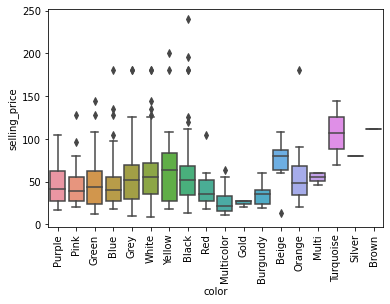

In [238]:
sns.boxplot(x=df['color'],y=df['selling_price'])
plt.xticks(rotation=90)
plt.show()

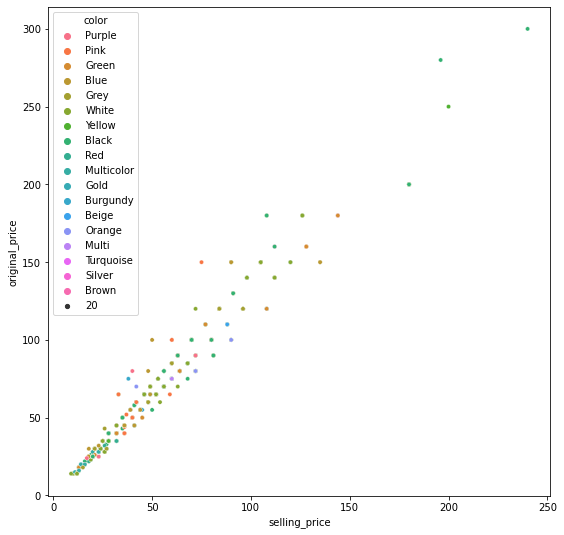

In [254]:
plt.figure(figsize=(9,9))
sns.scatterplot(df['selling_price'],df['original_price'],hue=df['color'],markers='*',size=20)
plt.show()

In [264]:
print(df.dtypes)

name               object
selling_price       int64
original_price      int64
availability       object
color              object
category           object
average_rating    float64
reviews_count       int64
product_type       object
dtype: object


In [266]:
# Minimum Sales,original_price,reviews_count ,Maximum sales,original_price,reviews_count, Mean sales price,original_price
#reviews_count,across \'Product Type' and 'Category'
df.groupby(['product_type','category']).agg({'selling_price':['min','max','mean'],'original_price':['min','max','mean'], \
                                            'reviews_count':['min','max','mean']})

selling_price                  original_price       \
                                  min  max        mean            min  max   
product_type category                                                        
Accessories  Kids                  13   13   13.000000             16   16   
             Men                   10   23   16.000000             14   28   
             Originals              9  196   43.727273             14  280   
             Running               21   21   21.000000             30   30   
             Soccer                18   32   25.000000             22   45   
             Training              12   36   21.360000             15   50   
             Women                 10   40   19.500000             14   50   
Clothing     Essentials            44   44   44.000000             55   55   
             Kids                  19   60   30.555556             23   75   
             Men                   18  240   39.760000             25  300   
             Originals             60   60   60.000000             75   75   
             Sportswear            72   72   72.000000             80   80   
             Women                 16  128   38.924855             20  160   
Shoes        Essentials            60   60   60.000000             85   85   
             Kids                  24  128   50.956522             30  160   
             Men                   20  180   79.676056             25  200   
             Originals             44  180   89.400000             55  200   
             Running               98  144  119.200000            140  180   
             Soccer                64  200   84.000000             80  250   
             Swim                  20   48   32.142857             25   60   
             Women                 20  126   61.405229             25  180   

                                    reviews_count                      
                               mean           min    max         mean  
product_type category                                                  
Accessories  Kids         16.000000            41     41    41.000000  
             Men          20.166667             2    120    33.416667  
             Originals    60.500000             1    298    50.272727  
             Running      30.000000            25     25    25.000000  
             Soccer       33.500000             5     38    21.500000  
             Training     28.360000             1    273    69.480000  
             Women        25.250000             2    154    40.250000  
Clothing     Essentials   55.000000            29     29    29.000000  
             Kids         40.074074             1     74    13.259259  
             Men          51.384000             1   1352   105.024000  
             Originals    75.000000             2      2     2.000000  
             Sportswear   80.000000            26     26    26.000000  
             Women        48.936416             1    671    50.416185  
Shoes        Essentials   85.000000           120    120   120.000000  
             Kids         66.710145             3    602   133.739130  
             Men         101.091549             1  11750   816.894366  
             Originals   112.714286            49  11750  1943.657143  
             Running     156.000000           491    584   528.200000  
             Soccer      105.000000            24    281   152.100000  
             Swim         39.285714            79   7291  4403.000000  
             Women        85.849673             3   9636   687.052288

In [267]:
# color wise max,min and mean selling price and original price and reviews count
df.groupby('color').agg({'selling_price':['min','max','mean'],'original_price':['min','max','mean'], \
                                            'reviews_count':['min','max','mean']})

selling_price                  original_price                   \
                     min  max        mean            min  max        mean   
color                                                                       
Beige                 14  108   71.833333             20  120   94.166667   
Black                 13  240   55.759777             18  300   72.340782   
Blue                  18  180   46.303922             25  200   60.029412   
Brown                112  112  112.000000            160  160  160.000000   
Burgundy              19   60   35.333333             23   75   47.000000   
Gold                  20   28   25.333333             25   35   31.666667   
Green                 12  144   49.237288             15  180   63.338983   
Grey                  10  180   54.632911             14  200   70.670886   
Multi                 46   60   54.500000             65   75   70.000000   
Multicolor            11   64   27.100000             15   80   35.000000   
Orange                20  180   59.454545             25  200   72.727273   
Pink                  20  128   42.741935             25  160   56.951613   
Purple                17  105   47.741935             24  150   62.000000   
Red                   18  105   40.760000             22  150   52.160000   
Silver                80   80   80.000000            100  100  100.000000   
Turquoise             70  144  107.000000            100  180  140.000000   
White                  9  180   59.353211             14  200   78.568807   
Yellow                18  200   70.941176             25  250   89.882353   

           reviews_count                      
                     min    max         mean  
color                                         
Beige                  1     83    49.666667  
Black                  1  11750   363.307263  
Blue                   2   7291   357.264706  
Brown                  2      2     2.000000  
Burgundy               3    377    94.222222  
Gold                  70   3812  1361.000000  
Green                  1   2540   166.152542  
Grey                   1   3938   364.607595  
Multi                  1   1599   800.250000  
Multicolor             2    120    36.550000  
Orange                 1   1518   310.545455  
Pink                   1   7291   375.903226  
Purple                 1   3812   225.225806  
Red                    1   2540   279.480000  
Silver                24     24    24.000000  
Turquoise             77    584   330.500000  
White                  1  11750   743.114679  
Yellow                 7   2540   418.882353

In [277]:
def continuous_analysis(x):
    print(f'{x} maximum is {df[x].max()}')
    print(f'{x} minimum is {df[x].min()}')
    print(f'{x} average is {df[x].mean()}')

In [278]:
# Selling price maximum, minumum and average value
selling_pricee=continuous_analysis('selling_price')

selling_price maximum is 240
selling_price minimum is 9
selling_price average is 52.91194209891435


In [276]:
# original price maximum, minumum and average value
original_pricee=continuous_analysis('original_price')

original_price maximum 300
original_price minimum 14
original_price average 69.00844390832329


In [280]:
# Averaging rating maximum, minumum and average value
average_rating=continuous_analysis('average_rating')

average_rating maximum is 5.0
average_rating minimum is 1.0
average_rating average is 4.608323281061517


In [281]:
# Reviews count maximum, minumum and average value
reviews_count=continuous_analysis('reviews_count')

reviews_count maximum is 11750
reviews_count minimum is 1
reviews_count average is 433.9433051869723


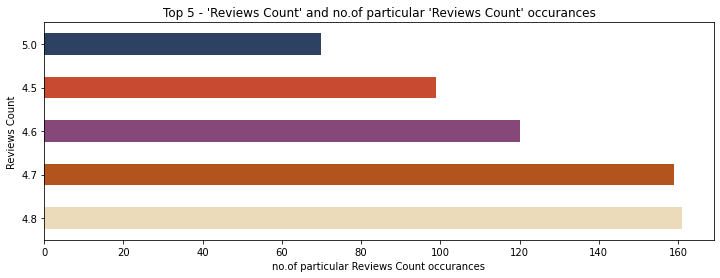

In [282]:
# Top 5 - 'Reviews Count' and no.of particular 'Reviews Count' occurances

plt.figure(figsize=(12,4))
df['average_rating'].value_counts().head(5).plot(kind='barh', color={'#864879','#2D4263','#C84B31', '#ECDBBA', '#B3541E'})
plt.ylabel('Reviews Count')
plt.xlabel('no.of particular Reviews Count occurances')
plt.title("Top 5 - 'Reviews Count' and no.of particular 'Reviews Count' occurances")
plt.show();

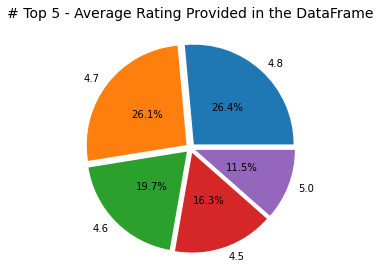

In [283]:
# Top 5 - Average Rating Provided

labels = df['average_rating'].value_counts().head(5).index
pie, ax = plt.subplots(figsize=[10,4])
plt.pie(x=df['average_rating'].value_counts().head(5).values, autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("# Top 5 - Average Rating Provided in the DataFrame", fontsize=14);
plt.tight_layout();

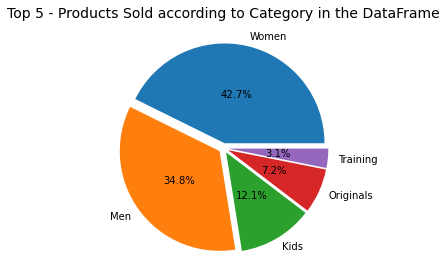

In [286]:
# Top-5 Products according to Category
labels = df['category'].value_counts().head(5).index
pie, ax = plt.subplots(figsize=[10,4])
plt.pie(x=df['category'].value_counts().head(5).values, autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Top 5 - Products Sold according to Category in the DataFrame", fontsize=14);
plt.tight_layout();

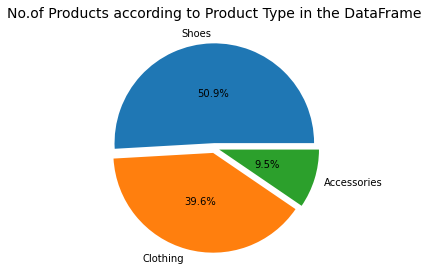

In [290]:
# No.of Products according to Product Type

labels = df['product_type'].value_counts().index
pie, ax = plt.subplots(figsize=[10,4])
plt.pie(x=df['product_type'].value_counts().values, autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5)
plt.title("No.of Products according to Product Type in the DataFrame", fontsize=14);
plt.tight_layout();

In [289]:
df.columns

Index(['name', 'selling_price', 'original_price', 'availability', 'color',
       'category', 'average_rating', 'reviews_count', 'product_type'],
      dtype='object')

In [293]:
# Calculating Discount

df['Discount'] = df['original_price'] - df['selling_price']


In [296]:
# Calculating Discount percentage
df['Discount(%)'] = round(((df['original_price'] - df['selling_price']) / (df['original_price']))*100,2)

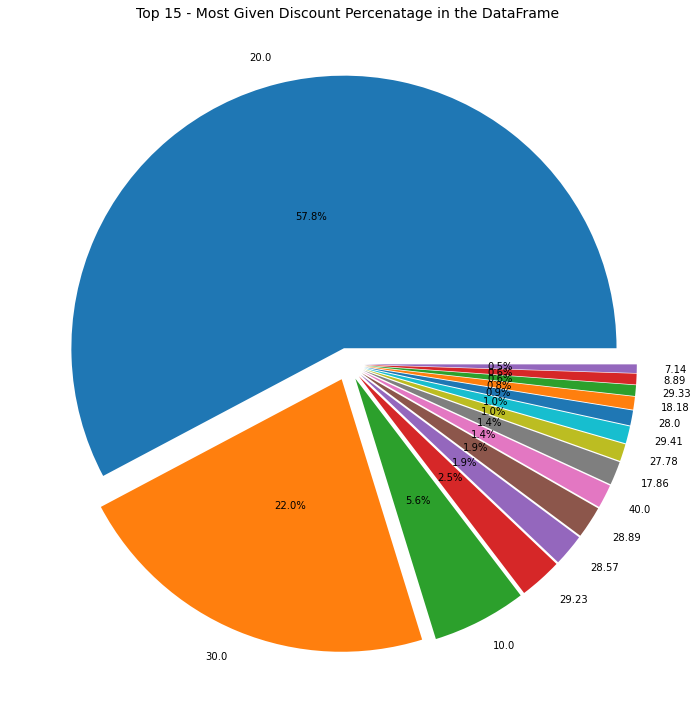

In [298]:
# Top 15 - Most Given Discount Percentage in the DataFrame

labels = df['Discount(%)'].value_counts().head(15).index
pie, ax = plt.subplots(figsize=[10,10])
plt.pie(x=df['Discount(%)'].value_counts().head(15).values, autopct="%.1f%%", explode=[0.06]*15, labels=labels, pctdistance=0.5)
plt.title("Top 15 - Most Given Discount Percenatage in the DataFrame", fontsize=14);
plt.tight_layout();